In [1]:
import os
from ultralytics import NAS
os.chdir("..")
ROOT = os.getcwd()
print(ROOT)


/Users/mautushid/github/Cowsformer


In [2]:
from models.nas import *
import pandas as pd
import matplotlib.pyplot as plt

The console stream is logged into /Users/mautushid/sg_logs/console.log


[2023-12-06 19:41:23] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-12-06 19:41:24] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-12-06 19:41:24] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2023-12-06 19:41:26] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-12-06 19:41:26] WARNING - export.py - Failed to import pytorch_quantization
[2023-12-06 19:41:26] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-12-06 19:41:26] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [3]:
### class inits and other inputs

path_model = 'yolo_nas_m' 
dir_train = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/train"
dir_val = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/val"
dir_test = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/test_old"
name_task = "cow200"

data_yaml_path = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/data.yaml"
finetuned_model_path_m = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_m_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_m_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_m_100_1/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_m_200_1/ckpt_best.pth"]

### Creating instance of Niche_YOLO_NAS class
my_nas = Niche_YOLO_NAS(path_model, dir_train, dir_val, dir_test, name_task)

[2023-12-06 19:41:27] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-12-06 19:41:27] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_m


In [4]:
# Initialize a list to store models
models_m = []

# Loop over each path and load the model
for path in finetuned_model_path_m:
    model_m = my_nas.load(path_model,path)  # Load the model using the current path
    models_m.append(model_m)

[2023-12-06 19:41:28] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-12-06 19:41:29] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_m_25_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-12-06 19:41:30] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_m_50_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-12-06 19:41:32] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_m_100_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-12-06 19:41:33] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_m_200_1/ckpt_best.pth EMA checkpoint.


In [5]:
evaluation_results_m = []

for model in models_m:
    metrics_m = my_nas.evaluate_trained_model(model, data_yaml_path, "test_old")  # Replace with your evaluation function
    evaluation_results_m.append(metrics_m)

[2023-12-06 19:41:33] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations:   0%|          | 0/45 [00:00<?, ?it/s]

model yolo_nas_m loaded


Testing:   0%|          | 0/3 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
Testing: 100%|██████████| 3/3 [01:06<00:00, 22.21s/it]
[2023-12-06 19:42:40] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/3 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parall

In [6]:
evaluation_results_m


[{'Precision@0.50': 0.8561151027679443,
  'Recall@0.50': 0.9444444179534912,
  'mAP@0.50': 0.9308497905731201,
  'F1@0.50': 0.8981132507324219,
  'Precision@0.50:0.95': 0.6422061920166016,
  'Recall@0.50:0.95': 0.708465576171875,
  'mAP@0.50:0.95': 0.6711881160736084,
  'F1@0.50:0.95': 0.6737107038497925},
 {'Precision@0.50': 0.8457943797111511,
  'Recall@0.50': 0.9576719403266907,
  'mAP@0.50': 0.9366742968559265,
  'F1@0.50': 0.8982630372047424,
  'Precision@0.50:0.95': 0.6434579491615295,
  'Recall@0.50:0.95': 0.7285714745521545,
  'mAP@0.50:0.95': 0.6861899495124817,
  'F1@0.50:0.95': 0.6833747029304504},
 {'Precision@0.50': 0.8188073635101318,
  'Recall@0.50': 0.9444444179534912,
  'mAP@0.50': 0.9229021072387695,
  'F1@0.50': 0.8771498799324036,
  'Precision@0.50:0.95': 0.6194954514503479,
  'Recall@0.50:0.95': 0.7145503163337708,
  'mAP@0.50:0.95': 0.6668861508369446,
  'F1@0.50:0.95': 0.663636326789856},
 {'Precision@0.50': 0.8655256628990173,
  'Recall@0.50': 0.9365079402923584

In [7]:
path_model = 'yolo_nas_l' 



finetuned_model_path_l = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_l_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_l_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_l_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_l_100_1/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_l_200_1/ckpt_best.pth"]



In [8]:
models_l = []

# Loop over each path and load the model
for path in finetuned_model_path_l:
    model_l = my_nas.load(path_model,path)  
    models_l.append(model_l)

Testing: 100%|██████████| 3/3 [01:11<00:00, 23.73s/it]
[2023-12-06 19:47:50] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_l_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-12-06 19:47:52] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_l_25_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-12-06 19:47:54] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_l_50_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-12-06 19:47:55] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_l_100_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-12-06 19:47:57] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_l_200_1/ckpt_best.pth EMA checkpoint.


In [9]:
evaluation_results_l = []

for model in models_l:
    metrics_l = my_nas.evaluate_trained_model(model, data_yaml_path, "test_old")  # Replace with your evaluation function
    evaluation_results_l.append(metrics_l)

[2023-12-06 19:47:57] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations:   0%|          | 0/45 [00:00<?, ?it/s]

model yolo_nas_l loaded


Testing:   0%|          | 0/3 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
Testing: 100%|██████████| 3/3 [01:29<00:00, 29.94s/it]
[2023-12-06 19:49:27] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/3 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parall

In [10]:
evaluation_results_l
#evaluation_results_m

[{'Precision@0.50': 0.8869779109954834,
  'Recall@0.50': 0.9550264477729797,
  'mAP@0.50': 0.9432951807975769,
  'F1@0.50': 0.9197452664375305,
  'Precision@0.50:0.95': 0.6818182468414307,
  'Recall@0.50:0.95': 0.7341269850730896,
  'mAP@0.50:0.95': 0.6942597031593323,
  'F1@0.50:0.95': 0.7070063352584839},
 {'Precision@0.50': 0.8734793066978455,
  'Recall@0.50': 0.9497354626655579,
  'mAP@0.50': 0.9321367740631104,
  'F1@0.50': 0.9100126624107361,
  'Precision@0.50:0.95': 0.6693430542945862,
  'Recall@0.50:0.95': 0.7277778387069702,
  'mAP@0.50:0.95': 0.6865392923355103,
  'F1@0.50:0.95': 0.6973384022712708},
 {'Precision@0.50': 0.8568019270896912,
  'Recall@0.50': 0.9497354626655579,
  'mAP@0.50': 0.9327782988548279,
  'F1@0.50': 0.9008783102035522,
  'Precision@0.50:0.95': 0.6465393900871277,
  'Recall@0.50:0.95': 0.7166666984558105,
  'mAP@0.50:0.95': 0.6761201024055481,
  'F1@0.50:0.95': 0.6797992587089539},
 {'Precision@0.50': 0.8494117856025696,
  'Recall@0.50': 0.95502644777297

In [11]:
evaluation_results_m

[{'Precision@0.50': 0.8561151027679443,
  'Recall@0.50': 0.9444444179534912,
  'mAP@0.50': 0.9308497905731201,
  'F1@0.50': 0.8981132507324219,
  'Precision@0.50:0.95': 0.6422061920166016,
  'Recall@0.50:0.95': 0.708465576171875,
  'mAP@0.50:0.95': 0.6711881160736084,
  'F1@0.50:0.95': 0.6737107038497925},
 {'Precision@0.50': 0.8457943797111511,
  'Recall@0.50': 0.9576719403266907,
  'mAP@0.50': 0.9366742968559265,
  'F1@0.50': 0.8982630372047424,
  'Precision@0.50:0.95': 0.6434579491615295,
  'Recall@0.50:0.95': 0.7285714745521545,
  'mAP@0.50:0.95': 0.6861899495124817,
  'F1@0.50:0.95': 0.6833747029304504},
 {'Precision@0.50': 0.8188073635101318,
  'Recall@0.50': 0.9444444179534912,
  'mAP@0.50': 0.9229021072387695,
  'F1@0.50': 0.8771498799324036,
  'Precision@0.50:0.95': 0.6194954514503479,
  'Recall@0.50:0.95': 0.7145503163337708,
  'mAP@0.50:0.95': 0.6668861508369446,
  'F1@0.50:0.95': 0.663636326789856},
 {'Precision@0.50': 0.8655256628990173,
  'Recall@0.50': 0.9365079402923584

In [12]:
###########for the small model ######################

In [13]:
path_model = 'yolo_nas_s' 



finetuned_model_path_s = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_s_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_s_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_s_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_s_100_1/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_s_200_1/ckpt_best.pth"]


In [14]:
models_s = []

# Loop over each path and load the model
for path in finetuned_model_path_s:
    model_s = my_nas.load(path_model,path)  
    models_s.append(model_s)

Testing: 100%|██████████| 3/3 [01:26<00:00, 28.78s/it]
[2023-12-06 19:55:14] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_s_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-12-06 19:55:14] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_s_25_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-12-06 19:55:15] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_s_50_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-12-06 19:55:15] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_s_100_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-12-06 19:55:16] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_s_200_1/ckpt_best.pth EMA checkpoint.


In [15]:
evaluation_results_s = []

for model in models_s:
    metrics_s = my_nas.evaluate_trained_model(model, data_yaml_path, "test_old")  
    evaluation_results_s.append(metrics_s)

model yolo_nas_s loaded


[2023-12-06 19:55:16] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/3 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
Testing: 100%|██████████| 3/3 [00:47<00:00, 15.79s/it]
[2023-12-06 19:56:04] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/3 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started 

Testing: 100%|██████████| 3/3 [00:47<00:00, 15.75s/it]


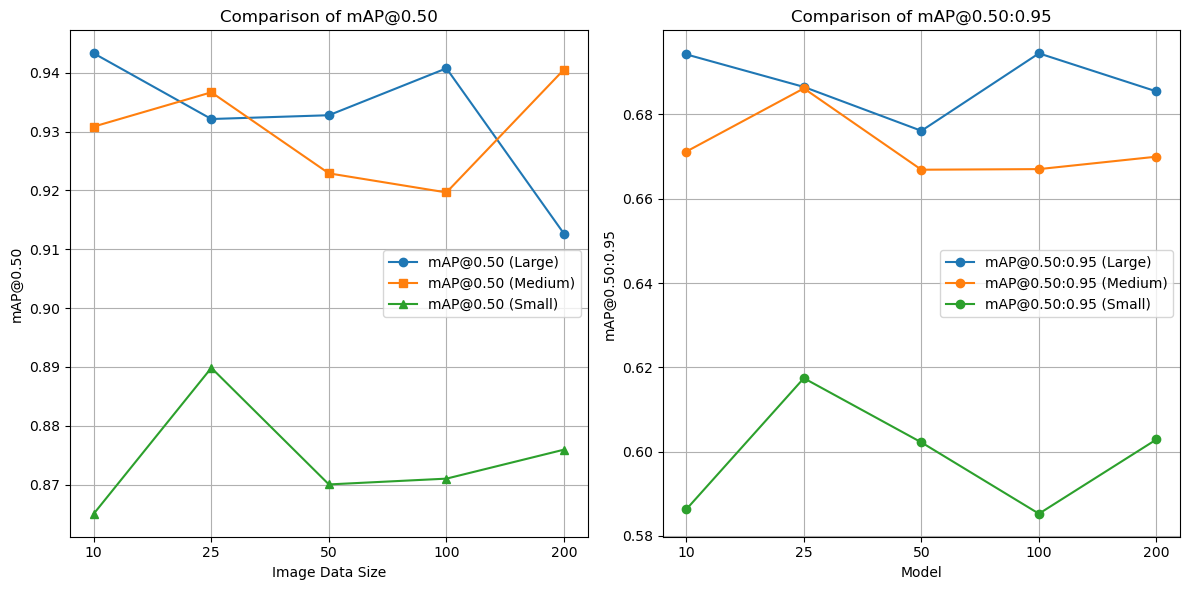

In [16]:

df_l = pd.DataFrame(evaluation_results_l)
df_m = pd.DataFrame(evaluation_results_m)
df_s = pd.DataFrame(evaluation_results_s)

df_l = pd.DataFrame(evaluation_results_l)
df_m = pd.DataFrame(evaluation_results_m)
df_s = pd.DataFrame(evaluation_results_s)

# Specific model labels
model_labels = ['10', '25', '50', '100', '200']

# Plotting
plt.figure(figsize=(12, 6))

# mAP@0.50 Plot
plt.subplot(1, 2, 1)
plt.plot(df_l['mAP@0.50'], '-o', label='mAP@0.50 (Large)')
plt.plot(df_m['mAP@0.50'], '-s', label='mAP@0.50 (Medium)')
plt.plot(df_s['mAP@0.50'], '-^', label='mAP@0.50 (Small)')
plt.title('Comparison of mAP@0.50')
plt.xlabel('Image Data Size')
plt.ylabel('mAP@0.50')
plt.xticks(range(len(df_l)), model_labels)
plt.legend()
plt.grid(True)

# mAP@0.50:0.95 Plot
plt.subplot(1, 2, 2)
plt.plot(df_l['mAP@0.50:0.95'], '-o', label='mAP@0.50:0.95 (Large)')
plt.plot(df_m['mAP@0.50:0.95'], '-o', label='mAP@0.50:0.95 (Medium)')
plt.plot(df_s['mAP@0.50:0.95'], '-o', label='mAP@0.50:0.95 (Small)')
plt.title('Comparison of mAP@0.50:0.95')
plt.xlabel('Model')
plt.ylabel('mAP@0.50:0.95')
plt.xticks(range(len(df_l)), model_labels)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


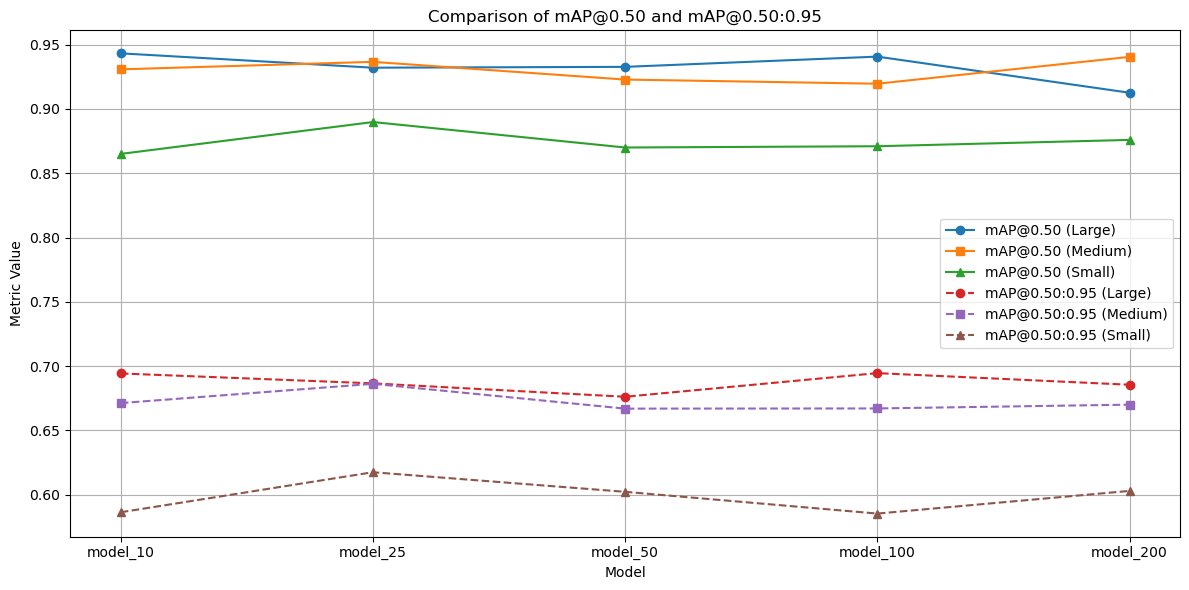

In [17]:

# Convert them to DataFrames
df_l = pd.DataFrame(evaluation_results_l)
df_m = pd.DataFrame(evaluation_results_m)
df_s = pd.DataFrame(evaluation_results_s)

# Specific model labels
model_labels = ['model_10', 'model_25', 'model_50', 'model_100', 'model_200']

# Plotting
plt.figure(figsize=(12, 6))

# Plot for mAP@0.50
plt.plot(df_l['mAP@0.50'], '-o', label='mAP@0.50 (Large)')
plt.plot(df_m['mAP@0.50'], '-s', label='mAP@0.50 (Medium)')
plt.plot(df_s['mAP@0.50'], '-^', label='mAP@0.50 (Small)')

# Plot for mAP@0.50:0.95
plt.plot(df_l['mAP@0.50:0.95'], '--o', label='mAP@0.50:0.95 (Large)')
plt.plot(df_m['mAP@0.50:0.95'], '--s', label='mAP@0.50:0.95 (Medium)')
plt.plot(df_s['mAP@0.50:0.95'], '--^', label='mAP@0.50:0.95 (Small)')

# Setting the labels and title
plt.title('Comparison of mAP@0.50 and mAP@0.50:0.95')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.xticks(range(len(df_l)), model_labels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
